<a href="https://colab.research.google.com/github/Veronika2311/prozhito_test/blob/main/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прожито

Возьмите дамп «прожито»:

https://www.dropbox.com/sh/8vfjjt8107sv9r3/AADOVR795M..

Выберите из него небольшой когерентный кусочек при помощи тулзы для работы с дампом (https://github.com/kilomeow/prozhito-tools)

Особенно интересно выбрать кусок максимально удаленный от сегодня или с по какой-то причине непохожим на сегодняшний интернет языком

Расскажите коротко, почему вы выбрали такой кусок

Разметьте его каким-то готовым NER решением

Предложите подход к оценке и анализу полученной разметки. Чего вы ждёте от неё, какие машина допустила ошибки, как их может показаться можным исправить. Почему современный NER допускает такие ошибки? Что вы вообще думаете об этом и смежном?

Если вдруг успеете, сделайте часть такого анализа.

## Отрывок

Теггеры обучаются на разных данных, но в основном "из коробки" их целью не является разметка именно дневниковых записей (или же кхудожественной литературы). Наташа, к примеру, обучена на корпусе новостей. Соответственно, при разметке дневников может появиться сразу несколько проблем. 
1. Язык и синтаксис другой эпохи (в Прожито, и даже в нашем отрывке есть дневники с 17го века).
2. Нетипичные сокращения и обозначения людей и мест буквально в ннесколько букв (а также разные обозначения одного и того же человека)
3. Вышедшие из употребления названия, имена и аббревиатуры

Поэтому подобрать ровно одну запись так, чтобы в ней проявлялись все эти отличительные черты, довольно сложно. Но можно, вероятно, взять несколько небольших отрывков с интересующими нас чертами и посмротреть на то, как они будут размечены.

Третья запись не является самой типичной, однако в ней лучше всего видно неоднозначности в моделях, она написана в 17 веке. Также это пример не вполне типичной записи, каковых встречается довольно много -- списки цен (которые не включены сюда потому, что с ценами не все библиотеки работают), списки музыкальных произведений, списки полков и армий, маршруты.

In [2]:
TEXT1 = '''Позавчера я сдал все дела и снова стал работать рядовым контролером. Заходил в ЭРО. Там мне выписали командировку в Москву, Житомир и Борисполь. 
Но когда я стал разговаривать с нач-ком ОТК, он своего согласия не дал. Я его все два дня уговорить пытался. А причина этому опять та, что Кравец остался за парторга 
цеха, а я буду снова за старшего, но в другой смене. Не хочется, но ничего не сделаешь.    
Черт с ним! Лишь бы мне только отпуск в сентябре вырвать, да на пароходе скататься. И дом суметь перед отпуском отремонтировать.'''

In [3]:
TEXT2 = '''Я купила себе шёлковый шарфик для шубы и с нетерпением ждала вечера, хотя, в то же время, боялась, что Конст. Хр. будет со мной скучать. О чём я буду с ним говорить? 
Приехав домой из техникума, я стала торопливо собираться, т. к. времени осталось мало; погладила платье, сделала маникюр, причесалась и, вдруг, звонок. 
Шура пошёл открывать – это был Аджемов, он пришёл, чтобы предупредить меня, что вместо 20-го, ему удалось достать билеты на 28-е, а на сегодняшний вечер он взял билеты на «Бедную невесту» Островского. 
Аджемов был очень мил и внимателен. 
Мы доехали до Никитской пл., затем пересели на другой трамвай, причём К. Х. хотел, т. к. времени было много, обязательно пройтись пешком. 
Мы встали у Зоопарка и, пройдя мимо пруда, на котором каталась Кити Толстого, пошли к Краснопресненской заставе.'''

In [4]:
TEXT3 = '''Божиею милостью Великого Государя, Царя и Великого Князя, Василия Ивановича, всей Руси Самодержца, Владимирского, 
Московского, Новгородского, Царя Казанского, Царя Астраханского, Царя Сибирского, Государя Псковского и Великого Князя 
Смоленского, Болгарского и иных, Государя и Великого Князя Новагорода Низовской земли, Черниговского, Рязанского, 
Ростовского, Ярославского, Белозерского, Удорского, Обдорского, Кондийского и всей Северной страны Повелителя, 
Государя Северской земли, Карталинских и Грузинских Царей и Кабардинской земли, Черкасских и Горских Князей и иных 
многих государств Государя и Обладателя, Его Царского Величества от старшины и воеводы и наместника Смоленского, 
Михаила Борисовича Шеина, в Оршу, Оршанскому старосте Андрею Ивановичу Сапеге. Августа 22 дня писал ты ко мне в листе 
своем с посланными своими, с Павликом Полежоным, что Государь ваш, Король Сигизмунд, приехал в Оршу и чтобы мне уведомить 
тебя о своевольных людях Государя вашего, учинивших обиды везде на границе Смоленской. И я неоднократно прежде сего писал 
к тебе, когда у Великого Государя нашего Царя и Великого Князя, Василия Ивановича, всей Русии Самодержца, в Москве, 
были послы вашего Короля, Николай Олесницкий и Александр Гонсевский и гонцы Станислав Витовский и Князь Ян Соколинский, 
и постановили между Великим Государем вашим, Королем Сигизмундом, и между их великими Государствами союз и мир, утвердив 
его союзными грамотами и крестным целованием на том*,* чтобы в перемирное время разрыва и войны никому не начинать, а 
которые люди Государя вашего в государстве нашего Государя, с панами и ротмистрами и со множеством Польских и Литовских 
людей, опустошают вместе с Самозванцем земли Государя нашего и проливают Христианскую кровь, и всех бы тех людей, по 
общему согласию, из государств Великого Государя нашего вашему Государю, Королю Сигизмунду, вывести, и впредь, в перемирные 
годы, не пропускать никого военным обычаем из Государств вашего Государя, и обманщиков, которые изменнически называют себя 
потомками Великих Государей, не держать и никакого вспомоществования им не оказывать. И после того посольского постановления
и утверждения, Польские и Литовские люди и доныне проливают Христианскую кровь в Государств нашего Государя и опустошают 
земли Государя нашего. А посланных твоих я отправил к тебе, не задерживая. Писано в Великого 
Государя нашего, Его Царского Величества, отчине, в городе Смоленске, 1609 года, Августа 22 дня.'''

### Natasha

Наташа -- наверное, первое, что могло бы прийти в голову при мысли о распознавании именных сущностей для русского языка. Легче и быстрее, чем DeepPavlov, но при этом не слишком сильно должна уступать ему в точности как минимум на новостных корпусах. Стандартная трёхчастная разметка человек-место-организация, что, с одной сстороны, неплохо для стандартного определения точности, с другой -- часто у именованных сущностей более сложная структура, например, должность + имя или упоминание организации и нескольких её подразделений, которые тоже являются организациями (например, ФиКЛ ФГН НИУ ВШЭ). С третьей -- дата и время, если нам нужны и они тоже, никак не могут быть распознаны с помощью этой библиотеки.

Поэтому можно предположить, что в некоторых случаях разметка может разбить одно длинное наименование на несколько или недоразметить слово из этого наименования, как это было в примерах в документации.

In [5]:
!pip install natasha

     |████████████████████████████████| 34.4MB 110kB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 8.2MB 42.7MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26100 sha256=b0fd33642df66a0130834f5fef319f3386ef12622084368660b5f52c5ce9f978
  Stored in directory: /root/.cache/pip/wheels/f3/f2/66/e9c30d3e9499e65ea2fa0d07c002e64de63bd0adaa49c445bf
Successfully built intervaltree
  Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [6]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [7]:
def natasha_result(TEXT):
      doc = Doc(TEXT)
      doc.segment(segmenter)
      doc.tag_ner(ner_tagger)
      display(doc.spans[:5])
      doc.ner.print()

### PullEnti

С одной стороны, много тегов. И нужных, и не очень нужных именно для дневниковых записей. Однако если просмотреть их бегло, то понятно, что записи в дневниках попадаются самой разной структуры, и где-то могли бы встретится, к примеру, телефоны. Однако в большей степени многие теги, возможно, если бы не были лишними здесь, то по крайней мере не являлись бы наиболее необходимыми. При этом плюсом данного разметчика является то, что кроме отдельных сущностей, он определяет и отношения между ними, так, что это не просто географический объект, но у него есть тип, и к этому же объекту првязываются разные именования одного и того же объекта, что может быть преимуществом и сделать разметку более удобной. 

In [9]:
!pip install pullenti-wrapper
!pip install graphviz

     |████████████████████████████████| 15.3MB 318kB/s 


In [10]:
from pullenti_wrapper.processor import (
    Processor,
    MONEY,
    URI,
    PHONE,
    DATE,
    KEYWORD,
    DEFINITION,
    DENOMINATION,
    MEASURE,
    BANK,
    GEO,
    ADDRESS,
    ORGANIZATION,
    PERSON,
    MAIL,
    TRANSPORT,
    DECREE,
    INSTRUMENT,
    TITLEPAGE,
    BOOKLINK,
    BUSINESS,
    NAMEDENTITY,
    WEAPON,
)

processor = Processor([PERSON, ORGANIZATION, GEO, DATE, MONEY])

In [36]:
def pullenty_result(TEXT):
    text = TEXT
    result = processor(text)
    return result.graph

### Stanza

For packages with 4 named entity types, supported types include PER (Person), LOC (Location), ORG (Organization) and MISC (Miscellaneous).

Всего четыре тега, три из них стандартны, и этого мало, если мы хотим кроме людей, мест и организаций, выделять ещё дату и время, к примеру. Однако из плюсов здесь есть выделение всего прочего в отдельную категорию. 

Между прочим, у stanza даже есть специальная модель под "old russian", но, к сожалению, именно распознавания именованных сущностей для этой модели нет. Зато есть лемматизация и POS-теги.

In [12]:
!pip install stanza

     |████████████████████████████████| 235kB 5.7MB/s 


In [13]:
import stanza
stanza.download('ru')
def stanza_result(text):
  nlp = stanza.Pipeline(lang='ru', processors='tokenize,ner')
  doc = nlp(text)
  print(*[f'entity: {ent.text}\ttype: {ent.type}' for sent in doc.sentences for ent in sent.ents], sep='\n')

2020-11-20 03:37:28 INFO: Downloading default packages for language: ru (Russian)...
2020-11-20 03:43:15 INFO: Finished downloading models and saved to /root/stanza_resources.


### Polyglot

Полиглот также размечает не так много категорий, если посмотреть на примеры, делает это не всегда логично. Лицензия не позволяет использование в коммерческих проектах. В целом кажется не идеальным вариантом для решения именно этой ззадачи.

In [14]:
!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download embeddings2.ru ner2.ru
from polyglot.text import Text

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-os2iuphm
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-os2iuphm
     |████████████████████████████████| 235kB 6.8MB/s 
     |████████████████████████████████| 41.4MB 105kB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70643 sha256=b3e5250265ceb8b4309c76aa83192a7a7ce048f472dd177610709b2dc3408196
  Stored in directory: /tmp/pip-ephem-wheel-cache-h2w8lqp_/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Created wheel for PyICU: filename=PyICU-2.6-cp36-cp36m-linux_x86_64.whl size=1288359 sha256=dae074df980b071f7874a1a384c533863e3cf119457ba6268c2a0b0bfe168722
  Stored in directory: /root/.cache/pip/wheels/31/21/2f/1c91831e8a93537ab21f6b4b935781b681104635fdb0315791
  Created wheel for pycld2: filename=pycld2-0.41-cp36-cp36m-linux_x86_64.whl size=9833531 sha256=a3935951c779936f66960a4612205be373c8

In [15]:
def polyglot_result(TEXT):
    for ent in Text(TEXT).entities:
        print(ent[0],ent.tag)

### DeepPavlov

Одно из известных "тяжёлых" решений на трансформерах, которое представляется создателями как более академическое и исследовательское, чем как коммерческое. Из плюсов также открытый исходный код. Из минусов -- очень тяжёлое всё, занимает много и памяти, и вычислительных ресурсов.

In [16]:
!pip3 install deeppavlov
!python3 -m deeppavlov install ner_ontonotes
!python -m deeppavlov install ner_ontonotes_bert

     |████████████████████████████████| 972kB 4.2MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 10.4MB 20.1MB/s 
     |████████████████████████████████| 7.3MB 9.8MB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 665kB 44.9MB/s 
     |████████████████████████████████| 1.5MB 44.9MB/s 
     |████████████████████████████████| 2.1MB 45.1MB/s 
     |████████████████████████████████| 6.7MB 28.7MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 512kB 34.9MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 860kB 38.4MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 2.6MB 37.1MB/s 
     |█

2020-11-20 03:45:11.775 INFO in 'deeppavlov.core.common.file'['file'] at line 32: Interpreting 'ner_ontonotes' as '/usr/local/lib/python3.6/dist-packages/deeppavlov/configs/ner/ner_ontonotes.json'
     |████████████████████████████████| 110.5MB 87kB/s 
     |████████████████████████████████| 3.8MB 34.6MB/s 
     |████████████████████████████████| 512kB 38.0MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=640135609a8951ee6b2925bb7a1814b02ec52b1732b4b8fe8cfbd04bef76ef30
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstal

In [37]:
from deeppavlov import configs, build_model

ner_model = build_model(configs.ner.ner_rus_bert, download=True)

2020-11-20 04:11:38.532 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/ner_rus_bert_v1.tar.gz download because of matching hashes
2020-11-20 04:11:52.452 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_v1.tar.gz download because of matching hashes
2020-11-20 04:11:52.912 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /root/.deeppavlov/models/ner_rus_bert/tag.dict]
2020-11-20 04:12:21.174 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /root/.deeppavlov/models/ner_rus_bert/model]


INFO:tensorflow:Restoring parameters from /root/.deeppavlov/models/ner_rus_bert/model


In [19]:
def deeppavlov_result(TEXT):
    result = ner_model([TEXT])
    for i in range(len(result[0][0])):
        if result [1][0][i] != 'O':
            print(result[0][0][i], result[1][0][i])

## TEXT1


Органицацию рапознали как место. Спорно, конечно, но кажется, вот она, проблема неиспользуемых аббревиатур. Города разметили правильно, и вторую аббревиатуру распознали как организацию, уже неплохо. Ничего не пропустили, не попытались запихнуть сокращение начальника в организацию.


In [20]:
natasha_result(TEXT1)

[DocSpan(start=79, stop=82, type='LOC', text='ЭРО', tokens=[...]),
 DocSpan(start=116, stop=122, type='LOC', text='Москву', tokens=[...]),
 DocSpan(start=124, stop=131, type='LOC', text='Житомир', tokens=[...]),
 DocSpan(start=134, stop=143, type='LOC', text='Борисполь', tokens=[...]),
 DocSpan(start=186, stop=189, type='ORG', text='ОТК', tokens=[...])]

Позавчера я сдал все дела и снова стал работать рядовым контролером. 
Заходил в ЭРО. Там мне выписали командировку в Москву, Житомир и 
          LOC                                  LOC───  LOC────   
Борисполь. 
LOC──────  
Но когда я стал разговаривать с нач-ком ОТК, он своего согласия не 
                                        ORG                        
дал. Я его все два дня уговорить пытался. А причина этому опять та, 
что Кравец остался за парторга 
    PER───                     
цеха, а я буду снова за старшего, но в другой смене. Не хочется, но 
ничего не сделаешь.    
Черт с ним! Лишь бы мне только отпуск в сентябре вырвать, да на 
пароходе скататься. И дом суметь перед отпуском отремонтировать.


Ура! Мы ещё даже до разбора не дошли, а всё уже сломалось.  Причём, к сожалению, внутри модуля

In [21]:
pullenty_result(TEXT1)

ValueError: ignored

То же самое спорное место, что у Наташи. Результаты совпадают.

In [22]:
stanza_result(TEXT1)

2020-11-20 04:02:58 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

2020-11-20 04:02:58 INFO: Use device: cpu
2020-11-20 04:02:58 INFO: Loading: tokenize
2020-11-20 04:02:58 INFO: Loading: ner
2020-11-20 04:03:06 INFO: Done loading processors!


entity: ЭРО	type: LOC
entity: Москву	type: LOC
entity: Житомир	type: LOC
entity: Борисполь	type: LOC
entity: ОТК	type: ORG
entity: Кравец	type: PER


Ошиблись и в выделениии редкоиспользуемой формы как персонажа, и даже не заметили вторую аббревиатуру. Первую приписали к местам.

In [23]:
polyglot_result(TEXT1)

ЭРО I-LOC
Москву I-LOC
Житомир I-LOC
Борисполь I-LOC
Кравец I-PER
скататься I-PER


То же, что у Наташи и stanza, только заняло всю оперативную память.

In [24]:
deeppavlov_result(TEXT1)

ЭРО B-LOC
Москву B-LOC
Житомир B-LOC
Борисполь B-LOC
ОТК B-ORG
Кравец B-PER


## TEXT2

1. Действительно споткнулась на нетипичном (для новостей-то особенно) сокращении 'Конст. Хр.', хотя это явно один человек. Ура, мы видим, что с дневниками не всё так просто.
2. Островский будет персонажем, и никак мы этого не избежим ('Протестую, Достоевский бессмертен!')
3. А вот 'Кити Толстого' один человек. Тоже минус.
Плюсы:
1. На просто инициалах не споткнулись.
2. Площадь и заставу не попытались оторвать от их названий (хотя в каком-то контексте и минус), выделили Зоопарк.
3. Не пропустили сущности.

In [25]:
natasha_result(TEXT2)

[DocSpan(start=103, stop=108, type='PER', text='Конст', tokens=[...]),
 DocSpan(start=320, stop=324, type='PER', text='Шура', tokens=[...]),
 DocSpan(start=351, stop=358, type='PER', text='Аджемов', tokens=[...]),
 DocSpan(start=508, stop=519, type='PER', text='Островского', tokens=[...]),
 DocSpan(start=522, stop=529, type='PER', text='Аджемов', tokens=[...])]

Я купила себе шёлковый шарфик для шубы и с нетерпением ждала вечера, 
хотя, в то же время, боялась, что Конст. Хр. будет со мной скучать. О 
                                  PER──                               
чём я буду с ним говорить? 
Приехав домой из техникума, я стала торопливо собираться, т. к. 
времени осталось мало; погладила платье, сделала маникюр, причесалась 
и, вдруг, звонок. 
Шура пошёл открывать – это был Аджемов, он пришёл, чтобы предупредить 
PER─                           PER────                                
меня, что вместо 20-го, ему удалось достать билеты на 28-е, а на 
сегодняшний вечер он взял билеты на «Бедную невесту» Островского. 
                                                     PER────────  
Аджемов был очень мил и внимателен. 
PER────                             
Мы доехали до Никитской пл., затем пересели на другой трамвай, причём 
              LOC─────────                                            
К. Х. хотел, т. к. времени было много, обязател

Ну что ж... Мы проигнорировали приблизительно всё и приблизительно всех, кроме Кити и Толстого, склеенных в одного человека. Очень грустно.

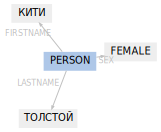

In [38]:
pullenty_result(TEXT2)

Относительно достойно, "Хр." разметили как разное и пропустили Шуру. Зато нашли "Бедную невесту"! Названия произведений тоже было бы хорошо видеть. Кити и Толстой снова неразлучны.

In [27]:
stanza_result(TEXT2)

2020-11-20 04:03:16 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

2020-11-20 04:03:16 INFO: Use device: cpu
2020-11-20 04:03:16 INFO: Loading: tokenize
2020-11-20 04:03:16 INFO: Loading: ner
2020-11-20 04:03:17 INFO: Done loading processors!


entity: Конст	type: PER
entity: Хр.	type: MISC
entity: Аджемов	type: PER
entity: Бедную невесту	type: MISC
entity: Островского	type: PER
entity: Аджемов	type: PER
entity: Никитской пл.	type: LOC
entity: К. Х.	type: PER
entity: Зоопарка	type: LOC
entity: Кити Толстого	type: PER
entity: Краснопресненской заставе	type: LOC


Всё очень-очень плохо без дополнительного обучения и танцев с бубном. Две лишних формы, много пропусков. зато Кити накогнец отделили. Сложное именование "Конст. Хр.", конечно, потеряно

In [28]:
polyglot_result(TEXT2)

причесалась I-LOC
Шура I-PER
Островского I-PER
Аджемов I-PER
внимателен I-PER
К I-PER
Кити I-PER


Аналогично Наташе, но снова оперативная память

In [29]:
deeppavlov_result(TEXT2)

Конст B-PER
. I-PER
Хр I-PER
. I-PER
Шура B-PER
Аджемов B-PER
Островского B-PER
Аджемов B-PER
Никитской B-LOC
пл I-LOC
К B-PER
. I-PER
Х I-PER
. I-PER
Зоопарка B-ORG
Кити B-PER
Толстого I-PER
Краснопресненской B-LOC
заставе I-LOC


## TEXT3

Оооо... Кажется, здесь и человек вполне может запутаться. В идеале до предлога "от" всё идёт один человек. Заодно здесь видно, как однотипные вроде бы вещи размечаются и как организация, и как место, а некоторые вообще не попали в сущности. "Земли Государя нашего" -- место, но без земель. Союз тоже место, но это объяснимо существованием его в поле слов, обозначающих страны. В целом разметка очень неравномерная, и вряд ои какой-то из теггеров справился лучше, случай-то сложный и в теории, и для обработки.

In [30]:
natasha_result(TEXT3)

[DocSpan(start=58, stop=75, type='PER', text='Василия Ивановича', tokens=[...]),
 DocSpan(start=82, stop=86, type='LOC', text='Руси', tokens=[...]),
 DocSpan(start=87, stop=97, type='PER', text='Самодержца', tokens=[...]),
 DocSpan(start=99, stop=112, type='ORG', text='Владимирского', tokens=[...]),
 DocSpan(start=115, stop=126, type='ORG', text='Московского', tokens=[...])]

Божиею милостью Великого Государя, Царя и Великого Князя, Василия 
                                                          PER─────
Ивановича, всей Руси Самодержца, Владимирского, 
─────────       LOC─ PER───────  ORG──────────  
Московского, Новгородского, Царя Казанского, Царя Астраханского, Царя 
ORG────────  LOC──────────  PER────────────  PER───────────────       
Сибирского, Государя Псковского и Великого Князя 
            PER────────────────                  
Смоленского, Болгарского и иных, Государя и Великого Князя Новагорода 
             LOC────────                                              
Низовской земли, Черниговского, Рязанского, 
                 LOC──────────  LOC───────  
Ростовского, Ярославского, Белозерского, Удорского, Обдорского, 
LOC────────  LOC─────────  LOC─────────  LOC──────  LOC───────  
Кондийского и всей Северной страны Повелителя, 
LOC────────        LOC──────────── LOC───────  
Государя Северской земли, Карталинских и Грузинских Царей и 
PER────

Очень красивый график. Частично на редкость осмысленный, частично -- Новагород человек. С титулами всё тяжело и их заносит в имена. Зато Русь и Киевская Русь -- один объект с типом государство. Также из хорошего Оршанский староста.

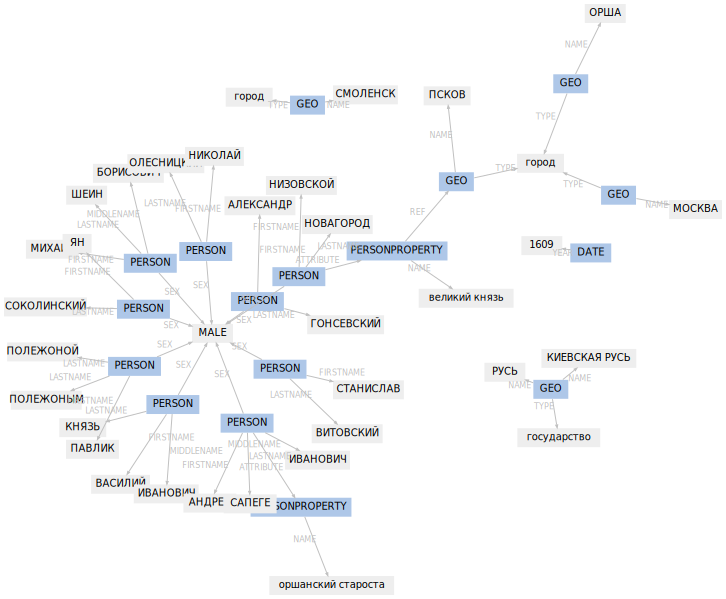

In [39]:
pullenty_result(TEXT3)

Имена и фамилии не разбивает, но зато и титулы не отделяет. Также разное и место в одном контексте -- Черниговского и Удорского, например. Выделили Христианскую кровь сложной конструкции, хотя и отнесли её к разному.

In [32]:
stanza_result(TEXT3)

2020-11-20 04:03:29 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

2020-11-20 04:03:29 INFO: Use device: cpu
2020-11-20 04:03:29 INFO: Loading: tokenize
2020-11-20 04:03:29 INFO: Loading: ner
2020-11-20 04:03:30 INFO: Done loading processors!


entity: Великого Государя	type: PER
entity: Царя	type: PER
entity: Великого Князя	type: PER
entity: Василия Ивановича	type: PER
entity: Руси Самодержца	type: PER
entity: Владимирского	type: PER
entity: Московского	type: MISC
entity: Новгородского	type: MISC
entity: Царя Казанского	type: PER
entity: Царя Астраханского	type: PER
entity: Царя Сибирского	type: PER
entity: Государя Псковского	type: PER
entity: Великого Князя 
Смоленского	type: LOC
entity: Государя	type: PER
entity: Великого Князя Новагорода	type: LOC
entity: Низовской земли	type: LOC
entity: Черниговского	type: MISC
entity: Рязанского	type: MISC
entity: Ростовского	type: MISC
entity: Ярославского	type: MISC
entity: Белозерского	type: LOC
entity: Удорского	type: LOC
entity: Обдорского	type: LOC
entity: Кондийского	type: LOC
entity: Северной страны	type: LOC
entity: Повелителя	type: PER
entity: Государя	type: PER
entity: Карталинских	type: LOC
entity: Грузинских Царей	type: LOC
entity: Кабардинской земли	type: LOC
entity: Чер

Лучше не сравнивать этот результат с другими, ибо даже здесь лишние срабатывание на вполне частотные местоимения.

In [33]:
polyglot_result(TEXT3)

Великого I-PER
Великого I-PER
Василия I-PER
Руси I-LOC
Владимирского I-LOC
Казанского I-PER
Сибирского I-PER
Псковского I-PER
Смоленского I-PER
Болгарского I-LOC
Новагорода I-PER
Удорского I-LOC
Обдорского I-LOC
Северной I-LOC
Михаила I-PER
Оршу I-LOC
Андрею I-PER
Августа I-PER
Павликом I-PER
Сигизмунд I-PER
Оршу I-LOC
Смоленской I-LOC
Великого I-PER
Великого I-PER
Василия I-PER
Москве I-LOC
Николай I-PER
Александр I-PER
Станислав I-PER
Ян I-PER
вашим I-PER
Королем I-PER
Великого I-PER
Королю I-PER
Великих I-LOC
Писано I-PER
Великого I-PER
Смоленске I-LOC
Августа I-PER


DeepPavlov не воспринимает записи больше определённой длины, несмотря на всю тяжеловесность. Кажется важным обратить внимание на такой случай, как и на сбой в pullenty.

In [34]:
deeppavlov_result(TEXT3)

RuntimeError: ignored

## Метрики

Большой соблазн использовать здесь Accuracy, конечно, однако для разных подходов и метрики должны опираться на разные вещи. Что, если pullenty связывает нам сущности, а одна из библиотек, тем не менее, связывать их не пытается, но выделяет лучше?
Accuracy -- возможное и, наверное, относительно неплохое решение при двух условиях:
1. Сравнивать необходимо не просто анализ в целом, а по категориям. Места отдельно, людей отдельно, организации отдельно. Иначе не так ясно видно, где именно проседает выбранный теггер.
2. Возможно, будет лучше разбивать ошибки по категориям, чтобы понимать, где не отмечена сущность, где отмечена лишняя, где неправильно определены границы, а где не тот тип. 
3. Теоретический скорее вопрос. Идеалом, возможно, была бы многослойная разметка, где сущности накладываются друг на друга. Например, 'доцент МГУ' было бы разобрано как должность на одном уровне и как содержащее в себе организацию -- на другом. Но тогда структура полученных тегов будет достаточно сложной, хотя именно это и пытается сделать pullenty. Так вот, один из теггеров может склоняться скорее к одному уровню, а второй -- к другому, и даже одна и та же модель после обучения может иметь некоторые изменения именно в этом. Поэтому здесь нужно или размечать тренировочный датасет вариативно, или понять, какой именно уклон нам нужен. Тем не менее, мне кажется, этот аспект всё равно следует не выпускать из внимания.
4. Ошибки необходимо учитывать и первого, и второго рода.

В таком случае любая метрика, соответствующая этим параметрам, подойдёт. Естественно, качество оценивать именно на дневниках и выбирать ту метрику, которая при этом достаточно нересурсозатратна.




## Итоги

Для мастерской я вижу нескольку путей и неясных мест, и здесь попробую предложить варианты.
1. Глубина разметки.  Хотим ли мы несколько уровней? Нужно ли, чтобы внутри отмеченного "Александр Сергеевич Пушкин" как единого человека содержалось то, что это имя, отчество и фамилия? Нужно ли выделить в конструкции из притяжательного имени и места и человека, и место? Нужна ли какая-то связь между тем и другим?
2. Количество и обширность тегов. Хотим ли мы, чтобы выделялись только имена собственные, названия мест и время? Или мы хотим поставить в соответствие то, что Киевская Русь -- страна, а Куйбышев -- город? Нужны ли нам здесь должности и всяческие наименования людей?
3. Некоторые из представленных решений имеют возможность дообучения. Таким образом, из собственных решений можно дообучать это или пытаться создать что-то из меньших частей кода? Или вообще применить то же приём, что при создании Наташи, когда более лёгкая модель обучалась на реультатах работы более тяжёлой.
4. Насколько важны вес модели и скорость её работы?

Что делать с ошибками?
1. Дообучать (сложно)
2. Выбрать в моделях категории, которые им удаются лучше всего, и для конкретной категории опираться на конкретную модель. (долго)
3. Устроить голосование моделей по этим категориям! И так можно было бы, к примеру, выявить самые спорные места (и заодно пропустить места, в которых ошибаются разом все или большая часть)
4. Учить собственную модель и страдать с ней (грустно)
5. Попробовать показать модели больше метаинформации (тоже сложно и неоднозначно, больше шансов запутаться)
6. Обучать её не абы как, а на выборке, сделанной случайно из разных годов, при этом распределение годов взять примерно как в корпусе. И разных авторов! (очевидно)

В общем, одного хорошего однозначного решения, которое избавило бы нас от всех проблем сразу, не существует, но можно попробовать всего понемногу.


## Постскриптум.

Тексты выбирались не только просмотром Прожито с помощью предлагаемых инструментов, но и чтением части дневников. 
Инструмент скачан, установлен и применяем, чему в подтверждение прикрепляется вторая тетрадка, не созданная с помощью колаба. 
Эксель конкретно на моём ноутбуке не слишком радуется объёму файла, зато Notepad чудесно и без вопросов его открывет. Собственно, поэтому и не прилагаются идентификаторы записей. Во-первых, тексты немного сокращены, во-вторых, все три записи находятся крайне легко. Здесь их извлечение не преставлено ради того, чтобы не загромождать тетрадку. 
Очень прошу извинить за длинные импорты и инсталлы, ибо в колабе их необходимо делать каждый раз.
